# Resume Screening - Applicant Tracking System (ATS)

Henry Yost, Riya Ashok, Angelina Jordan, Gokul Giridharan, and Refugio Zepeda Jr

## Project Outline
> Answer

## Dataset Exploration & Variables in the Dataset
> Answer more in depth

Given a dataset of resumes, can we assess if someone is qualified for the job position?

### Plan

1. Use BERT to classify the categories into 'buckets'
2. Save each bucket as a new CSV file
3. For the CSV file most closely related, find a very specific Job Description (i.e., Software Engineer @ Apple)
4. Preprocess resumes (lowercasing, removing symbols, indents, etc)
5. Use RegEx and hard criteria to filter resumes (Phase 1)
6. Pick an IDEAL resume for the position (let's say the person is leaving, and use their resume as the ideal one to fill in the position)
7. TF-IDF on applicants' resume and ideal --> Cosine similarity, Rank in order
8. Human looks through the top 20 resumes and marks as qualified or not
9. Use resume BERT embeddings for logistical regression
10. Naive Bayes with TF-IDF?
11. Lastly, combine via Soft voting, rank fusion or stacking (not sure which one would work best)

In [3]:
# Library Importing
import pandas as pd
import re #RegEx

## 1. Importing Dataset & Cleaning

In [5]:
df_orig = pd.read_csv("Resume.csv")
df = df_orig.drop("Resume_html", axis=1) # Drop HTML, because we do not need it

# All possible categories: HR, Designer, Information-Technology, Teacher, Advocate, Business-Development, 
# Healthcare, Fitness, Agriculture, BPO, Sales, Consultant, Digital-Media, Automobile, Chef, 
# Finance, Apparel, Engineering, Accountant, Construction, Public Relations, Banking, Arts, Aviation

# Remove non-relevant data noise (keep IT, Healthcare, Sales, Engineering, HR)
df = df[df["Category"].isin(["INFORMATION-TECHNOLOGY", "HEALTHCARE", "SALES", "ENGINEERING", "HR"])].reset_index(drop=True)

df.to_csv("new_data.csv")

In [68]:
# Using RegEx to clean the Resume strings
def clean_resume(text):
    text = text.lower() # Make everything lowercase.
    text = re.sub(r'\s+', ' ', text) # replaces whitespace characters with a single space.
    text = re.sub(r'\/+', ' ', text) # replaces / characters with a single space (some resumes use backslashes)
    text = re.sub(r'[^a-z0-9\s\.\-]', '', text) # keeps letters, numbers, whitespace, periods, and dashes.
    text = re.sub(r'\s+', ' ', text).strip() # replaces leading and trailing whitespace characters.
    return text

df["Cleaned_str"] = df["Resume_str"].apply(clean_resume)

# Also, there are no NaN values, so we don't need to drop any rows.

df.head()

,ID,Resume_str,Category,Cleaned_str
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR,hr administrator marketing associate hr admini...
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...",HR,hr specialist us hr operations summary versati...
2,33176873,HR DIRECTOR Summary Over 2...,HR,hr director summary over 20 years experience i...
3,27018550,HR SPECIALIST Summary Dedica...,HR,hr specialist summary dedicated driven and dyn...
4,17812897,HR MANAGER Skill Highlights ...,HR,hr manager skill highlights hr skills hr depar...


## 4. Exploratory Data Analysis (EDA)

<Axes: xlabel='Category'>

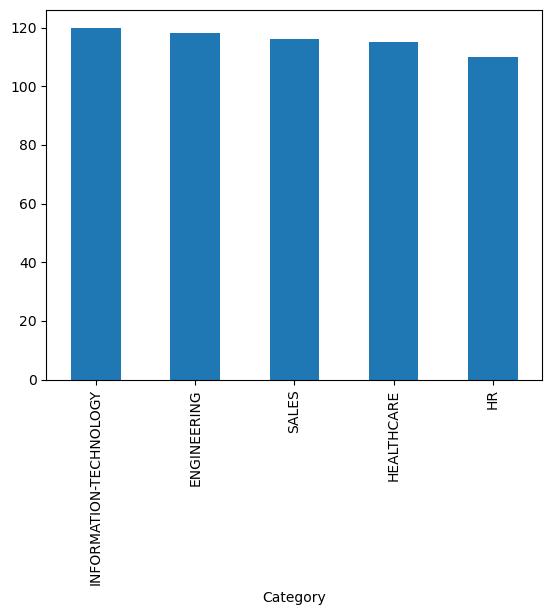

In [11]:
import matplotlib.pyplot as plt

cat_count = df['Category'].value_counts()
cat_count.plot.bar()

# Tesla Software and Energy Engineer
## 1. First Resume Cleaning Cycle

In [12]:
tesla_job_desc = (
    "Develop, enhance and debug new and existing real-time software in C/C++ in embedded RTOS environments. "
    "Work with HW and system teams on building testing infrastructure. Help design and bring up state of the art HIL/SIL validation infrastructure. "
    "Help implement software tests for HIL/SIL infrastructure. Assist in tool development for testing and system integration. "
    "Own implementation of software/firmware features end to end. What You'll Bring "
    "Pursuing a Degree in Computer Science, Electrical Engineering, Physics or related field. "
    "Desired to have strong understanding of Python debug simple circuits. "
    "Desired to have good electrical and electronics fundamentals to be able to understand schematics and desired to have test driven development mindset. "
    "Remain engaged, proactive and positive while solving very challenging problems. "
    "Own assignments and take full accountability for overall team success. "
    "Capable of delivering top quality C/ C++ code for embedded systems."
)

# Phase 1 filtering based on tesla_job_desc using ReGeX

# 1. Parse and normalize resumes & job descriptions
# 2. Extract requirements from job descriptions
# 3. Define filter criteria & apply filters to resumes
# 4. Potentially use BERT for semantics

## 2. Second Resume Cleaning Cycle

In [44]:
# Using TF-IDF and cosine similarity to rank the resumes based on the ideal resume 

## 3. Third Resume Cleaning Cycle & SVM Training

In [19]:
# Train SVM on synthetic lables